<a href="https://colab.research.google.com/github/johyunkang/py_pandas/blob/main/python_ml_perfect_guide_04_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chapter 04 분류
### 01 분류(Classification)의 개요

앙상블 기법(Ensemble Method)
- 배깅(Bagging)
 - 랜덤 포레스트(Random Forest) : 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성
- 부스팅(Boosting)
 - 그래디언트 부스팅(Gradient Boosting) : 뛰어난 예측성능, 수행 시간이 너무 오래 걸림
 - XgBoost(eXtra Gradient Boost), LightGBM
- 스태킹(Stacking) : 앙상블의 앙상블 기법

### 02 결정 트리 (Decision Tree)
![decision-tree](https://user-images.githubusercontent.com/291782/139259554-404aa34c-c7bb-48e8-8446-2d928a4672ad.png)

- 규칙노드(Decision Node) : 규칙조건이 있는 노드
- 리프노드(Leaf Node) : 결정된 클래스 값
- 새로운 규칙조건 마다 서브트리가 생성됨
- 트리의 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높다. (과적합(Overfitting))


결정 트리 장점
- 쉽다. 직관적
- 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않음


결정 트리 단점
- 과적합으로 알고리즘 성능이 떨어진다. 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝 필요



DecisionTreeClassifier 와 DecisionTreeRegressor 파라미터 설명
- min_samples_split
 - 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는데 사용됨
 - 디폴트는 2이고, 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가
 - 과적합을 제어. 1로 설정할 경우 분할되는 노드가 많아져서 과적합 가능성 증가
- min_samples_leaf
 - 말단 노드(Leaf)가 되기 위한 최소한의 샘플 데이터 수
 - Min_samples_split와 유사하게 과적합 제어 용도. 그러나 비대칭적(imbalanced) 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우는 작게 설정 필요
- max_feature
 - 최적의 분할을 위해 고려할 최대 피처 개수. 디폴트는 None으로 데이터 세트의 모든 피처를 사용해 분할 수행
 - int형으로 지정하면 대상 피처의 개수, float형으로 지정하면 전체 피처 중 대상 피처의 퍼센트임
 - 'sqrt'는 전체 피처 중 sqrt(전체 피처 개수). 즉 $sqrt{전체피처개수}$ 만큼 선정
 - 'auto'로 지정하면 'sqrt'와 동일
 - 'log'는 전체 피정 중 log2(전체 피처 개수) 선정
 - 'None'은 전체 피처 선정
- max_depth
 - 트리의 최대 깊이를 규정
 - 디폴트는 None. None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split 보다 작아질 때까지 계속 깊이를 증가시킴.
 - 깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요
- max_leaf_nodes
 - 말단 노드(Leaf)의 최대 개수

#### 결정 트리 모델의 시각화
**Graphviz**를 윈도우에 설치 필요  
Graphviz는 파이썬으로 개발된 패키지가 아님

설정방법
1. https://graphviz.gitlab.io/_pages/Download/Download_windows.html 경로에서 시스템에 맞게 내려받은 뒤 설치
2. 1의 경로 파일을 설치 했으면 Graphviz의 파이썬 래퍼 모듈을 PIP를 이용해 설치 (cmd를 관리자 권한으로 실행 후 아래 명령어 실행)
```python
pip install graphviz
```

자세한 설명은 p.191 참조

In [1]:
pip install graphviz

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 생성
dt = DecisionTreeClassifier(random_state=111)

# 붓꽃 데이터 로딩 후 학습 과 테스트 데이터 세트로 분리
iris_data = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=111)

# DT 학습
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=111, splitter='best')

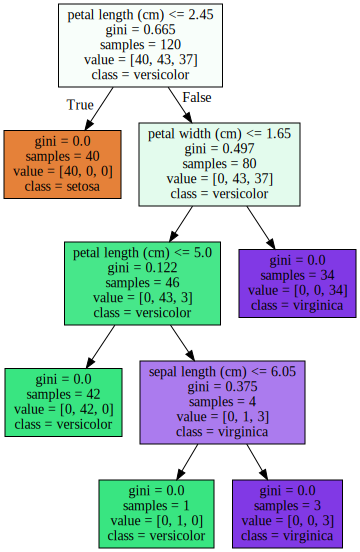

In [3]:
from sklearn.tree import export_graphviz

# !! Google Colab 방법과 주피터 노트북 방법은 다름

# 주피터 노트북 방법 1/2
# export_graphviz() 의 호출결과로 out_file로 지정된 tree.dot 파일을 생성함
#export_graphviz(dt, out_file="tree.dot", class_name=iris_data.target_names, feature_names = iris_data.feature_names, impurity=True, filled=True)


import graphviz
# # 위에서 생성된 tree.dot 파일을 graphviz가 읽어서 주피터 노트북상에서 시각화
# 주피터 노트북 방법 2/2
# with open("tree.dot") as f:
#     dot_graph = f.read()
# graphviz.Source(dot_graph)


# 구글 코랩 방법 1/1
dot_data = export_graphviz(dt
                        #   , max_depth=3
                          , feature_names=iris_data.feature_names
                          , class_names=iris_data.target_names
                          , filled=True
                          , impurity=True
                        #  , proportion=True
                          )
display(graphviz.Source(dot_data))

### 결정 트리 과적합(Overfitting)

결정 트리가 어떻게 학습 데이터를 분할해 예측을 수행하는 지와 이로 인한 과적합 문제를 시각화해 알아보겠음

2개의 피처가 3가지 유형의 클래스 값을 가지는 데이터 세트를 만들고 이를 그래프 형태로 시각화하겠음.

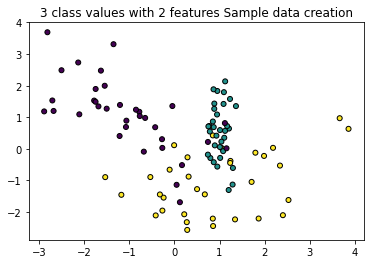

In [4]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 class values with 2 features Sample data creation')

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
x_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# print(x_features) # ndarray data
# print(y_labels) # 0 1 2 숫자들

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(x_features[:, 0], x_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')


### 결정트리 실습 - 사용자 행동 인식 데이터 세트


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DF로 로드
feature_name_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
print("feature_name_df:\n", feature_name_df.head())

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('\n 전체 피처명 중 10개만 추출:', feature_name[:10])

# 중복된 피처명 확인
feature_dup_df = feature_name_df.groupby('column_name').count()
print('feature_dup_df count:\n', feature_dup_df[feature_dup_df['column_index'] > 1].count())    # 총 42개 피처가 중복됨
print('feature_dup_df:\n', feature_dup_df[feature_dup_df['column_index'] > 1].head(10))


feature_name_df:
    column_index        column_name
0             1  tBodyAcc-mean()-X
1             2  tBodyAcc-mean()-Y
2             3  tBodyAcc-mean()-Z
3             4   tBodyAcc-std()-X
4             5   tBodyAcc-std()-Y

 전체 피처명 중 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']
feature_dup_df count:
 column_index    42
dtype: int64
feature_dup_df:
                               column_index
column_name                               
fBodyAcc-bandsEnergy()-1,16              3
fBodyAcc-bandsEnergy()-1,24              3
fBodyAcc-bandsEnergy()-1,8               3
fBodyAcc-bandsEnergy()-17,24             3
fBodyAcc-bandsEnergy()-17,32             3
fBodyAcc-bandsEnergy()-25,32             3
fBodyAcc-bandsEnergy()-25,48             3
fBodyAcc-bandsEnergy()-33,40             3
fBodyAcc-bandsEnergy()-33,48             3
fBo

In [6]:
# 중복된 피처명에 대해 _1 또는 _2를 추가로 부여해 새로운 피처명을 가지는 DF 반환 함수 생성
def get_new_feature_name_df(old_feature_name_df) :
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                    columns=['dup_cnt'])
    print('feature_dup_df:\n', feature_dup_df.head())
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    print('new_feature_name_df:\n', new_feature_name_df)

    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0] + '_' + str(x[1]) if x[1] > 0 else x[0], axis=1)
    print('new_feature_name_df:\n', new_feature_name_df);

    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df


In [9]:
import pandas as pd

# get_human_dataset() 함수는 앞으로 자주 사용할 예정
def get_human_dataset() :
    # 각 데이터 파일은 공백으로 분리. 공백문자를 sep 으로 할당.
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명을 DF로 생성
    new_df = get_new_feature_name_df(df)

    # DF에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DF로 로딩. 컬럼명은 feature_name 적용
    x_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    x_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터를 DF로 로딩하고 컬러명은 action으로 부여
    y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])

    # 로드된 학습/테스트 DF를 모두 반환
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = get_human_dataset()

print('## 학습 데이터 셋 info()')
print(x_train.info())

print('## 레이블 값 value_counts() ')
print(y_train['action'].value_counts())
print('y_train:\n', y_train)

feature_dup_df:
    dup_cnt
0        0
1        0
2        0
3        0
4        0
new_feature_name_df:
      index  column_index                           column_name  dup_cnt
0        0             1                     tBodyAcc-mean()-X        0
1        1             2                     tBodyAcc-mean()-Y        0
2        2             3                     tBodyAcc-mean()-Z        0
3        3             4                      tBodyAcc-std()-X        0
4        4             5                      tBodyAcc-std()-Y        0
..     ...           ...                                   ...      ...
556    556           557      angle(tBodyGyroMean,gravityMean)        0
557    557           558  angle(tBodyGyroJerkMean,gravityMean)        0
558    558           559                  angle(X,gravityMean)        0
559    559           560                  angle(Y,gravityMean)        0
560    560           561                  angle(Z,gravityMean)        0

[561 rows x 4 columns]
new_fea

### DecisionTreeClassifier 를 이용해 동작 예측 분류 수행

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도축을 위해 random_state 설정
dt = DecisionTreeClassifier(random_state = 156)
dt.fit(x_train, y_train)
pred = dt.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

# 결정트리의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt.get_params())

결정 트리 예측 정확도:0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [13]:
# 결정트리의 깊이(Tree Depth)가 예측 정확도에 영향을 주는지 테스트 (약 2분의 시간이 걸림)
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [6, 8, 10, 12, 16, 20, 24]}

grid_cv = GridSearchCV(dt, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(x_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)
# colab 에서 최고 평균 정확도: 0.8513, 최적 하이퍼 파라미터 max_depth: 16, 실행시간 : 1분 58초

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.9min finished


GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [14]:
# GridSearchCV 의 cv_result_ 속성은 CV 세트에 하이퍼 파라미터를 순차적으로 입력했을 때의 성능 수치를 가지고 있음
# max_depth에 따른 평가 데이터 세트의 평균 정확도 수치(cv_result_ 의 'mean_test_score'값)를 cv_results_ 에서 추출해 보겠음

# GridSearchCV 객체의 cv_results_ 속성을 DF로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]   # max_depth 가 16일때 mean_test_score 는 0.851344 로 가장 높다.

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [16]:
# max_depth 의 변환에 따른 값을 측정
max_depths = [6, 8, 10, 12, 16, 20, 24]

# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths :
    dt = DecisionTreeClassifier(random_state=156, max_depth=depth)
    dt.fit(x_train, y_train)
    pred = dt.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth:', depth, ' 정확도:{0:.4f}'.format(accuracy))

# max_depth 가 8일 때, 정확도가 0.8707로 가장 높았고, 이후 depth 가 깊어질수록 정확도는 점점 더 떨어짐

max_depth: 6  정확도:0.8558
max_depth: 8  정확도:0.8707
max_depth: 10  정확도:0.8673
max_depth: 12  정확도:0.8646
max_depth: 16  정확도:0.8575
max_depth: 20  정확도:0.8548
max_depth: 24  정확도:0.8548


In [17]:
# max_depth 와 min_samples_split을 같이 변경하면서 정확도 성능 튜닝
params = {'max_depth':[8, 12, 16, 20], 'min_samples_split':[16, 24]}

grid_cv = GridSearchCV(dt, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(x_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)
# 수행시간: 2분 19초, 정확도:0.8549, 최적 하이퍼 파라미터 : {'max_depth': 8, 'min_samples_split': 16}

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.3min finished


GridSearchCV 최고 평균 정확도 수치:0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [18]:
# best_estimator_ 는 최적 하이퍼 파라미터인 'max_depth': 8, 'min_samples_split': 16 으로 학습이 완료된 Estimator 객체
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:', accuracy)

결정 트리 예측 정확도: 0.8717339667458432


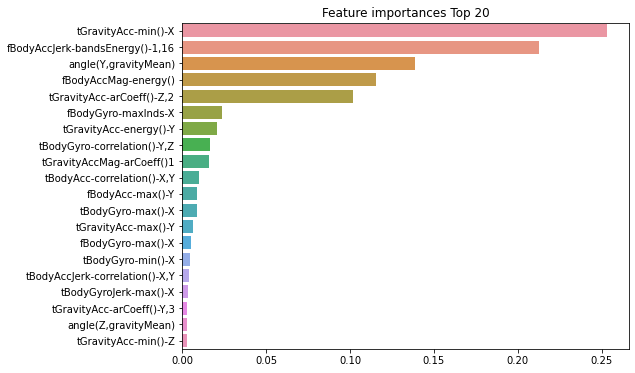

In [19]:
# 결정 트리에서 각 피처의 중요도를 feature_importances_ 속성을 이용해 알아보겠음
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

# TOP 중요도로 정렬을 쉽게 하고, 시본(seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)

# 중요도값 순으로 Series 정렬
ftr_top_20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top_20, y=ftr_top_20.index)
plt.show()